In [1]:
import mlflow
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from utils.dataloader import ForSeaDataset
from models.DeepKernelLearner import FeatureExtractor

In [2]:
# config = {
#     'lr': 0.01,
#     'epochs': 100,
#     "batch_accumulation": 32,
#     # 'fish_types': ["Sild", "Kolmule", "Torsk", "Makrell", "Sei", "Hyse", "Uer (vanlig)"],
#     'fish_types': ["Torsk", "Sei", "Hyse"],
#     'gear_types': ["Trål"],
#     'log_target': False,
#     "criterion": "exponential_nll",
#     "optimizer": "sgd",
#     'model_params': {
#         'filters': (32, 64, 128, 256),
#         "output_activation": "relu"
#     },
#     'ocean_data_path': '../data/copernicus/datasets/norway.nc',
#     'route_data_path': '../data/VMS_DCA_joined/catch_routes.parquet'
# }
config = {
    'lr': 0.01,
    'epochs': 100,
    "batch_accumulation": 32,
    # 'fish_types': ["Sild", "Kolmule", "Torsk", "Makrell", "Sei", "Hyse", "Uer (vanlig)"],
    'fish_types': ["Torsk", "Sei", "Hyse"],
    'gear_types': ["Trål"],
    'mode': "classification",
    'log_target': False,
    "thresholds": [1000, 1000, 1000],
    "criterion": "cross_entropy_with_logits",
    "optimizer": "adam",
    'model_params': {
        'filters': (32, 64, 128, 256)
    },
    'ocean_data_path': '../data/copernicus/datasets/norway.nc',
    'route_data_path': '../data/VMS_DCA_joined/catch_routes.parquet'
}

In [3]:
from train_gaussian_filter_decoder import train

model = train(config, run_name='Gaussian_filter_classification')

[  1,   500] | loss: 0.070314 accuracy: 0.669660
[  1,  1000] | loss: 0.000235 accuracy: 0.688733
[  1,  1500] | loss: 0.000230 accuracy: 0.692862
[  1,  2000] | loss: 0.000233 accuracy: 0.692154
[  1,  2500] | loss: 0.000237 accuracy: 0.688533
[  1,  3000] | loss: 0.000229 accuracy: 0.685028
[  1,  3500] | loss: 0.000234 accuracy: 0.686829
[  1,  5480] | train loss: 0.000229 val accuracy: 0.698905 | val loss: 0.000233 val accuracy: 0.688164 
[  2,   500] | loss: 0.000234 accuracy: 0.690191
[  2,  1000] | loss: 0.000230 accuracy: 0.689091
[  2,  1500] | loss: 0.000235 accuracy: 0.689530
[  2,  2000] | loss: 0.000233 accuracy: 0.687967
[  2,  2500] | loss: 0.000234 accuracy: 0.685437
[  2,  3000] | loss: 0.000228 accuracy: 0.692892
[  2,  3500] | loss: 0.000233 accuracy: 0.694500
[  2,  5283] | train loss: 0.000238 val accuracy: 0.674364 | val loss: 0.000233 val accuracy: 0.688164 
[  3,   500] | loss: 0.000237 accuracy: 0.684211
[  3,  1000] | loss: 0.000231 accuracy: 0.686523
[  3,  1

KeyboardInterrupt: 

In [3]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 6.2151e-02,  2.0800e-02,  5.9411e-02],
          [-1.0667e-01, -4.1570e-02, -2.7930e-02],
          [ 7.1058e-02, -4.7100e-02,  3.4035e-02]],

         [[ 1.5417e-02, -1.0735e-01, -3.9501e-03],
          [-1.4403e-02, -1.4042e-02,  4.2850e-02],
          [ 8.8141e-02,  3.7571e-02,  1.7325e-02]],

         [[-4.5143e-02,  6.0770e-02, -1.1318e-01],
          [-3.9316e-02,  6.8816e-02,  5.5100e-02],
          [ 3.7245e-02, -4.0239e-02, -1.1611e-01]],

         ...,

         [[-4.2313e-02, -8.2281e-02, -2.2588e-02],
          [-8.5293e-03,  5.2150e-04,  7.4596e-02],
          [ 1.3631e-03, -6.0666e-02,  7.6881e-02]],

         [[ 6.8313e-02, -1.0131e-01, -5.8472e-02],
          [ 2.3873e-02, -2.7681e-02,  7.7516e-02],
          [ 2.5940e-02,  1.6584e-02, -3.3438e-02]],

         [[-8.1937e-02, -4.2041e-02,  4.5409e-02],
          [ 3.7425e-02,  2.2271e-02,  2.4752e-02],
          [-6.0833e-02,  1.0796e-03, -7.1437e-02]]],


        [[[ 4.3007e-02, -8.1734

In [3]:
from utils.dataloader import ForSeaDataset

dataset = ForSeaDataset(
    config["ocean_data_path"],
    config["route_data_path"],
    fish_types=config["fish_types"],
    gear_types=config["gear_types"],
    mode=config["mode"],
    log_target=config["log_target"],
    thresholds=config["thresholds"],
    batch_size=1,
    shuffle=True,
)

In [4]:
ocean, route, target = dataset.__getitem__(0)
target

<xarray.DataArray 'time' ()>
array('2011-01-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-01-01T12:00:00
Attributes:
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    axis:                 T
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    valid_min:            534732.0
    valid_max:            534732.0
0
<xarray.DataArray 'time' ()>
array('2011-01-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-01-01T12:00:00
Attributes:
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    axis:                 T
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    valid_min:            534732.0
    valid_max:            534732.0
0
<xarray.DataArray 'time' ()>
array('2011-01-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-01-01T12:00:00
Attributes:
    lon

tensor([[1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 1., 0.]], device='cuda:0')

In [7]:
y_true = []
y_pred = []
total_len = 0
model.eval()
with torch.no_grad():
    for ocean, route, rw in dataset.val_data():
        total_len += rw.shape[0]
        y_true.append(rw.cpu())
        y_pred.append(model(ocean, route).cpu())
print(total_len)

82671


In [8]:
y_true = torch.cat(y_true, dim=0)
y_pred = torch.cat(y_pred, dim=0)
y_true.shape

torch.Size([82671, 3])

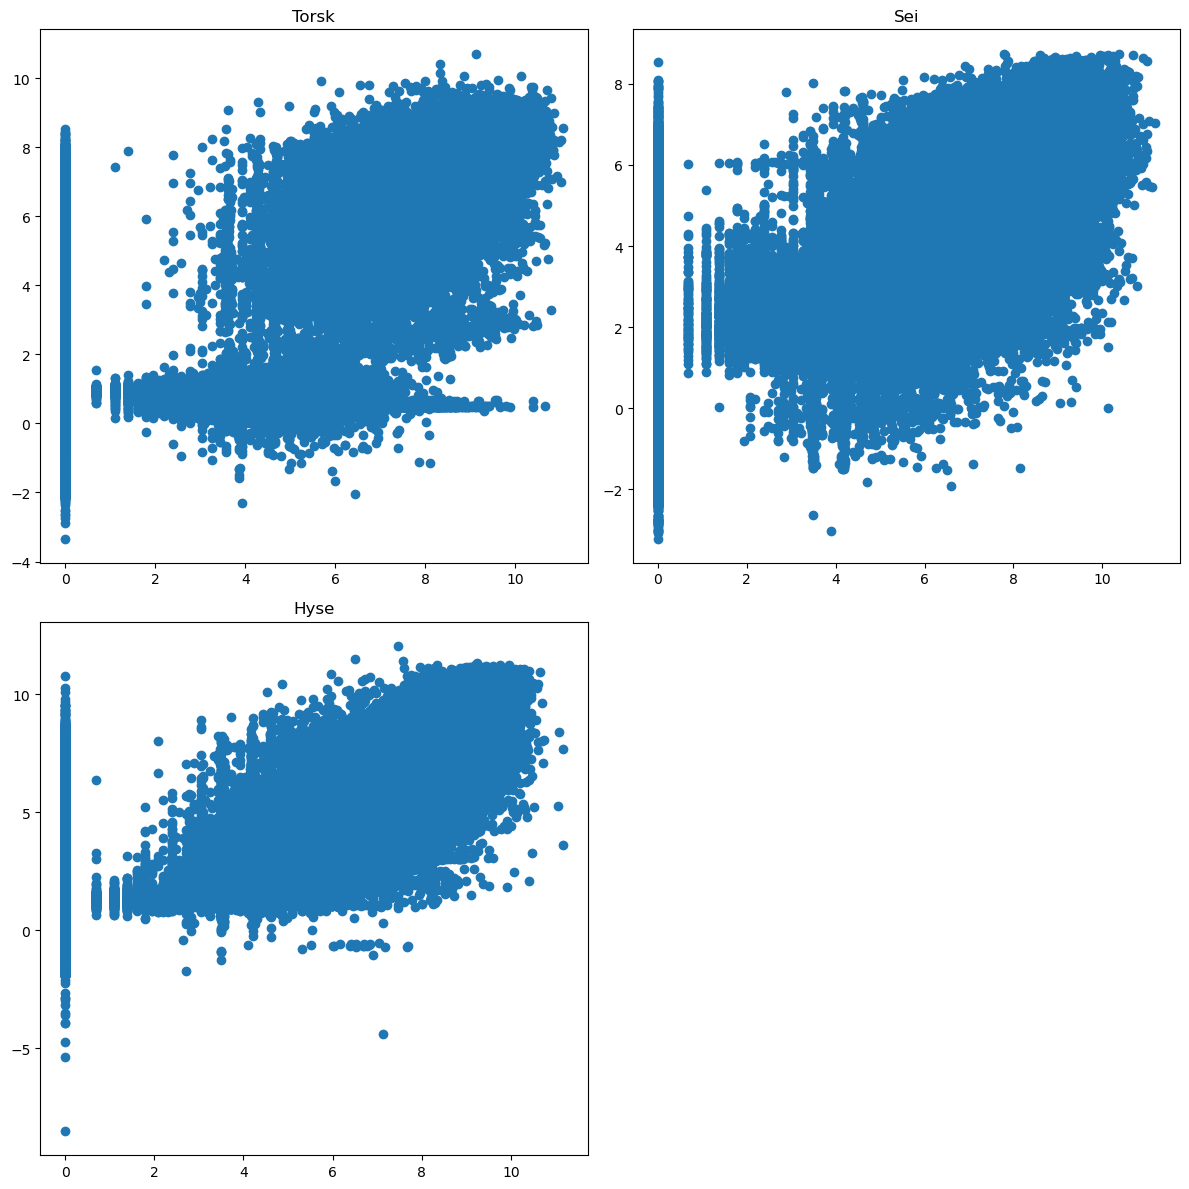

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i, fish_type in enumerate(dataset.fish_types):
    plt.subplot(2,2,i+1)
    plt.scatter(y_true[:,i], y_pred[:,i])
    # plt.loglog(y_true[:,i]+1, y_pred[:,i]+1, '.')
    plt.title(fish_type)
plt.tight_layout()
plt.show()

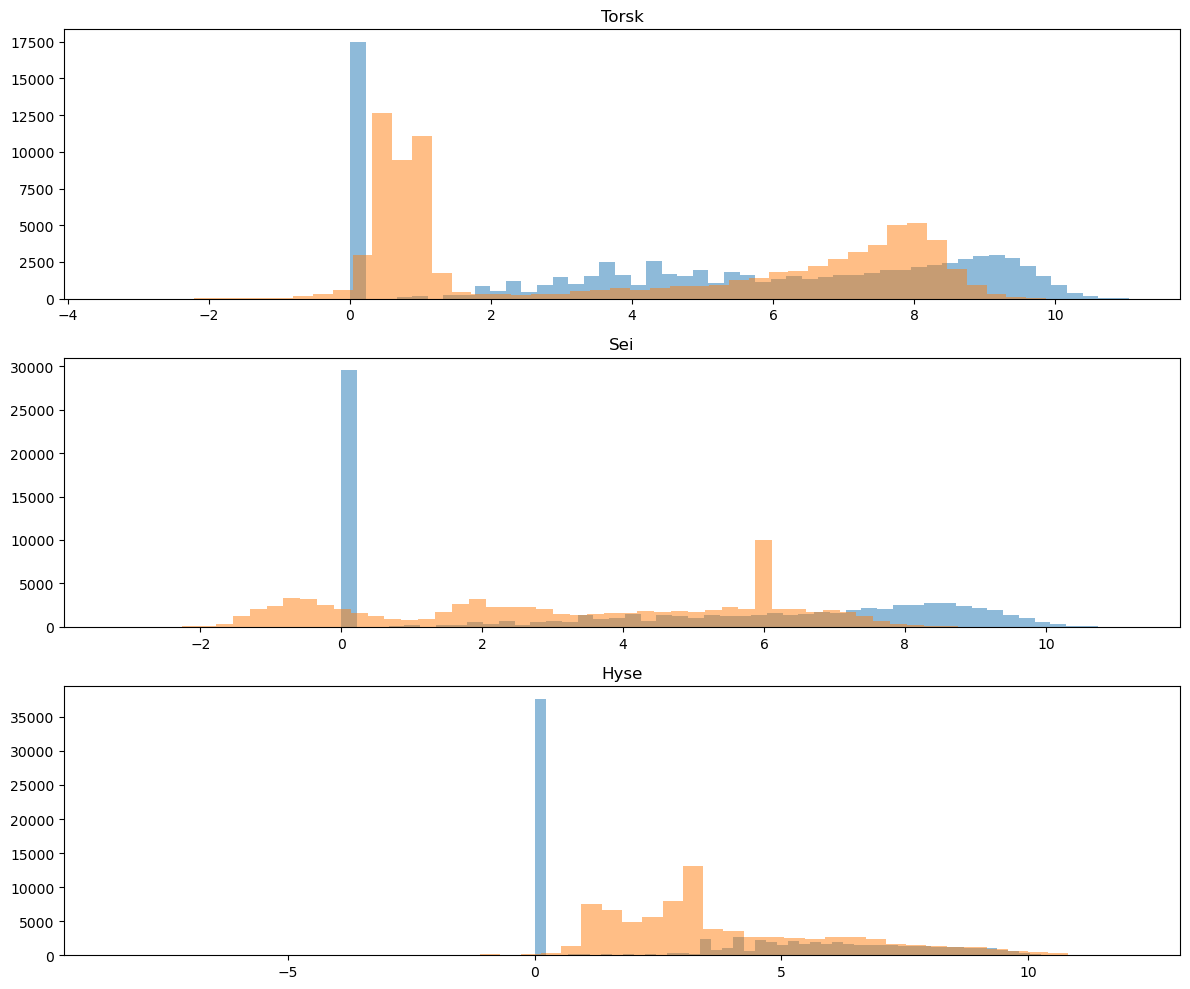

In [10]:
plt.figure(figsize=(12,10))
for i, fish_type in enumerate(dataset.fish_types):
    plt.subplot(3,1,i+1)
    plt.hist(y_true[:,i], bins=50, alpha=0.5)
    plt.hist(y_pred[:,i], bins=50, alpha=0.5)
    plt.title(fish_type)
plt.tight_layout()
plt.show()

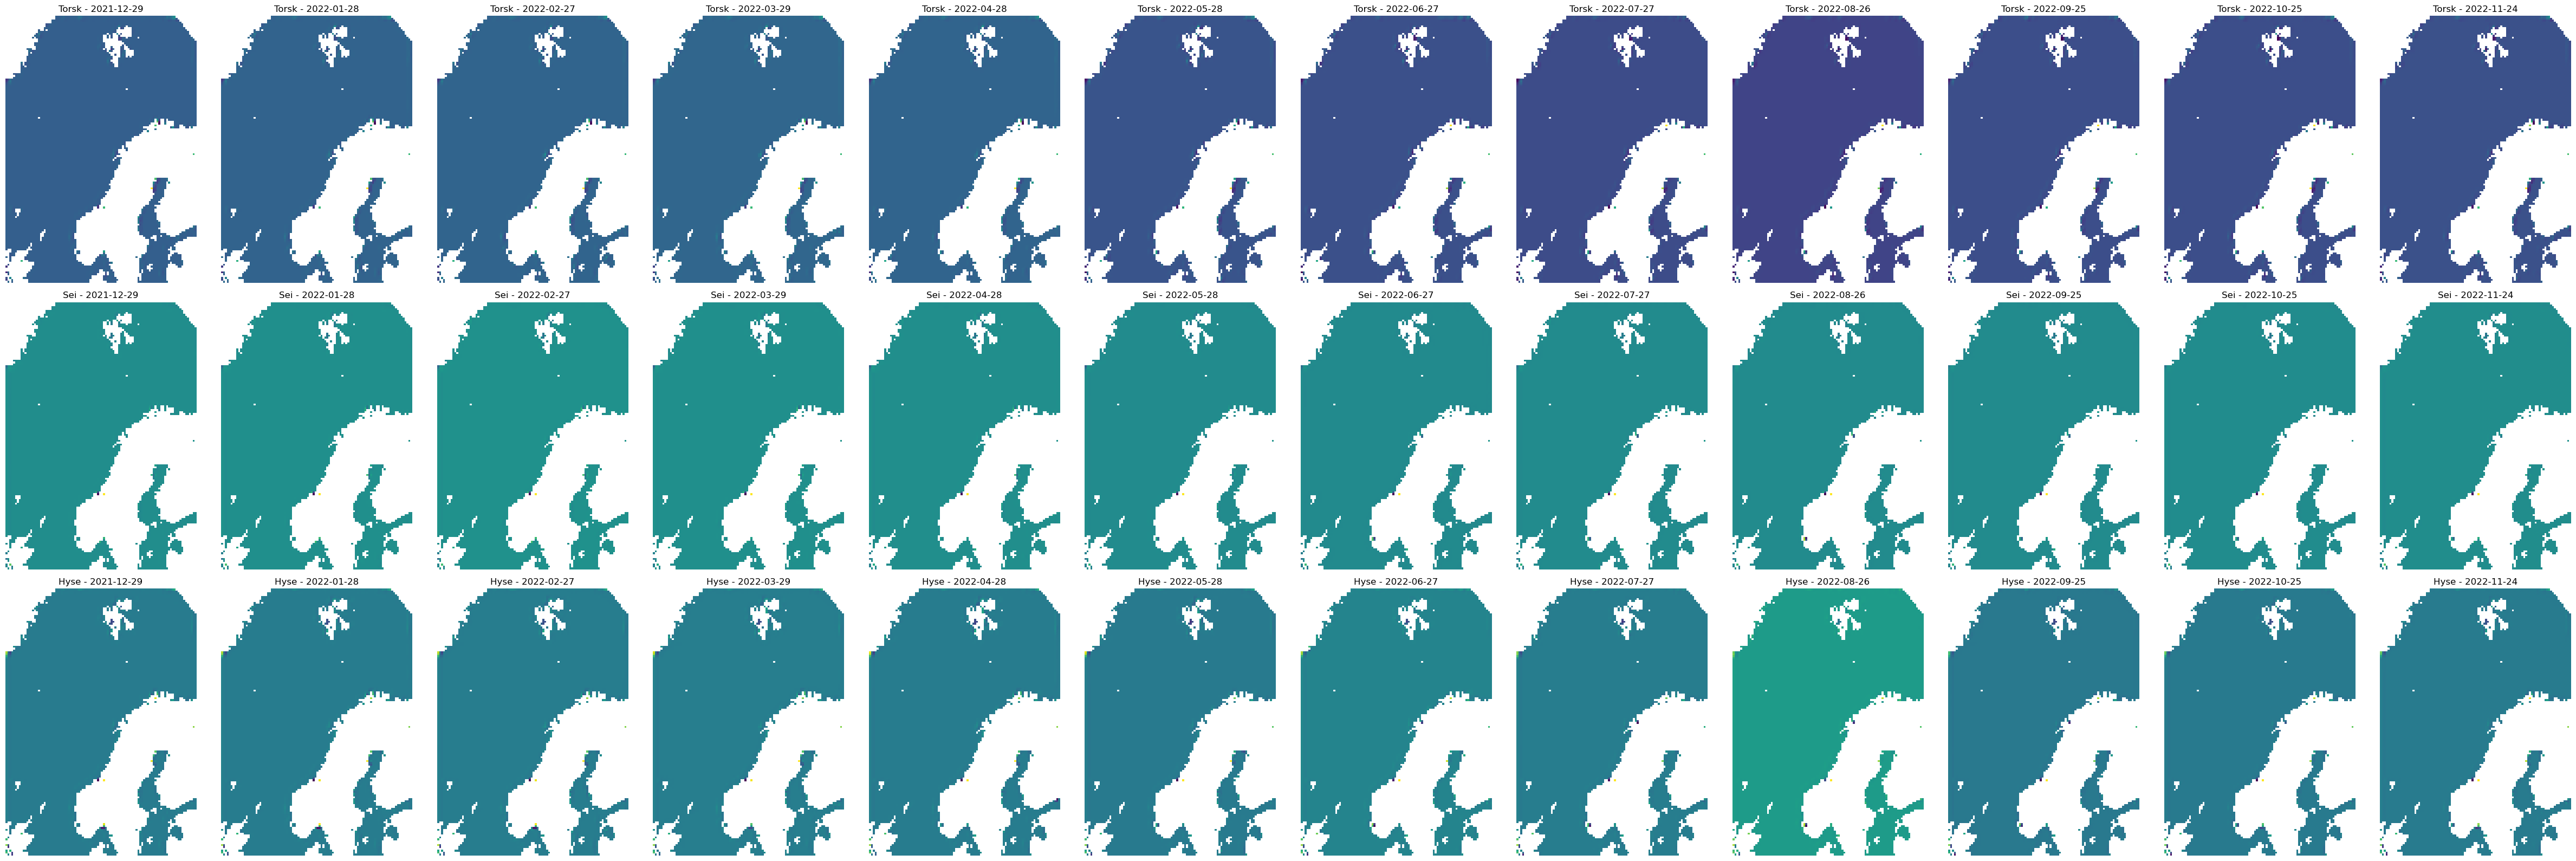

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

n = 12
n_fish = len(dataset.fish_types)
fig, ax = plt.subplots(n_fish, n, figsize=(48, 16))
model.eval()
with torch.no_grad():
    for i in range(n):
        idx = 11*365 + 30*i
        ocean, route, rw = dataset.__getitem__(idx)
        ocean_state = model.encoder_module(ocean)
        for j, fish_type in enumerate(dataset.fish_types):
            rw_pred = ocean_state[0,j].cpu()
            # rw_pred = np.log1p(rw_pred)
            ax[j,i].imshow(np.ma.masked_array(rw_pred, 1-dataset.land_mask))
            ax[j,i].set_title(f"{fish_type} - {dataset.dates[idx]}")
            ax[j,i].axis('off')
plt.tight_layout()
plt.show()

In [9]:
torch.save(model, '../models/cnn_gaussian_filter_v1.pt')

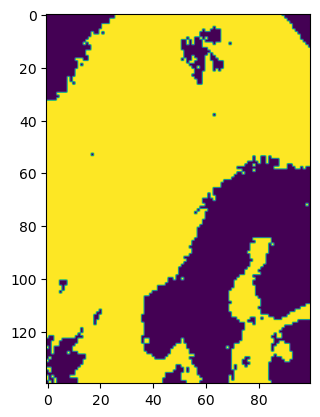

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(dataset.land_mask)

In [ ]:

mask = np.where(np.isnan(dataset.ocean_data.isel(time=0).vo.to_numpy()), 0, 1)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
config = {
    'lr': 0.001,
    'epochs': 10,
    'log_target': True,
    'model_params': {
        'filters': (16, 16, 16),
        'kernel_size': (3,3),
        'hidden_layers': (128,),
        'output_activation': None
    },
    'ocean_data_path': '../data/copernicus/datasets/norway.nc',
    'route_data_path': '../data/VMS_DCA_joined/catch_routes.parquet'
}

In [ ]:
gpu = torch.device('cuda:0')

dataset = ForSeaDataset(config['ocean_data_path'], config['route_data_path'], log_target=False, sequence_len=None, batch_size=1)

In [ ]:
ocean, route, rw = next(iter(dataset.train_data()))

In [ ]:
ocean.shape

torch.Size([1, 10, 140, 100])

In [ ]:
from models.StateDecoder import ForseaAutoEncoder

model = ForseaAutoEncoder(dataset.ocean_data_shape, (32, 16, 8), (128, 64), 7).cuda()

In [ ]:
model.eval()
pred = model(ocean, route)

In [ ]:
pred

tensor([[0.0000e+00, 1.4387e-01, 1.6622e-01, 0.0000e+00, 4.3427e-02, 1.1897e-01,
         0.0000e+00],
        [0.0000e+00, 1.5609e-01, 1.7427e-01, 0.0000e+00, 4.1342e-02, 1.0769e-01,
         0.0000e+00],
        [0.0000e+00, 1.3073e-01, 1.5767e-01, 0.0000e+00, 4.0887e-02, 1.2840e-01,
         0.0000e+00],
        [0.0000e+00, 1.1530e-01, 1.4343e-01, 0.0000e+00, 4.5712e-02, 1.4318e-01,
         0.0000e+00],
        [4.9645e-02, 9.0441e-02, 2.4745e-01, 0.0000e+00, 0.0000e+00, 1.4140e-01,
         0.0000e+00],
        [1.2986e-02, 0.0000e+00, 2.4139e-01, 0.0000e+00, 0.0000e+00, 1.5550e-01,
         0.0000e+00],
        [0.0000e+00, 1.5739e-01, 2.8101e-01, 0.0000e+00, 5.6886e-03, 7.7960e-02,
         0.0000e+00],
        [1.0347e-01, 1.9287e-01, 3.0248e-01, 2.4287e-02, 3.4458e-02, 0.0000e+00,
         0.0000e+00],
        [1.1515e-02, 7.6567e-02, 1.5205e-01, 0.0000e+00, 7.6017e-02, 1.4842e-01,
         0.0000e+00],
        [1.2448e-02, 6.9323e-02, 1.9091e-01, 0.0000e+00, 5.0775e-02, 1.30

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/VMS_DCA_joined/catch_routes.parquet')

In [27]:
X = df.loc[(df['main_catch'] == 'Torsk') & (df['gear_group'] == 'Trål'), 'Torsk']
# X = df.loc[(df['Torsk'] > 0) & (df['gear_group'] == 'Trål'), 'Torsk']

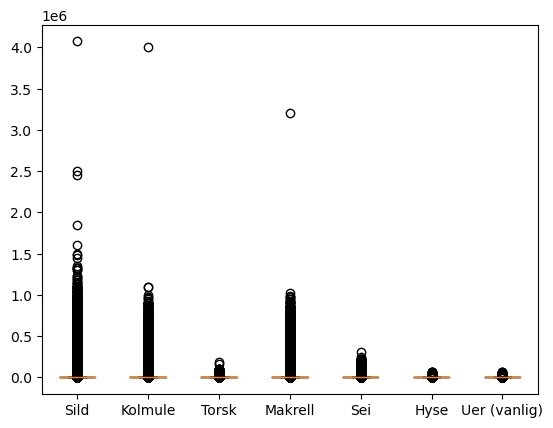

In [65]:
fish_types = ["Sild", "Kolmule", "Torsk", "Makrell", "Sei", "Hyse", "Uer (vanlig)"]

# plt.bar(np.arange(len(fish_types)), [np.mean(df[f] > 1000) for f in fish_types])
plt.boxplot([df[f] for f in fish_types])
plt.xticks(np.arange(len(fish_types))+1, fish_types)
plt.show()

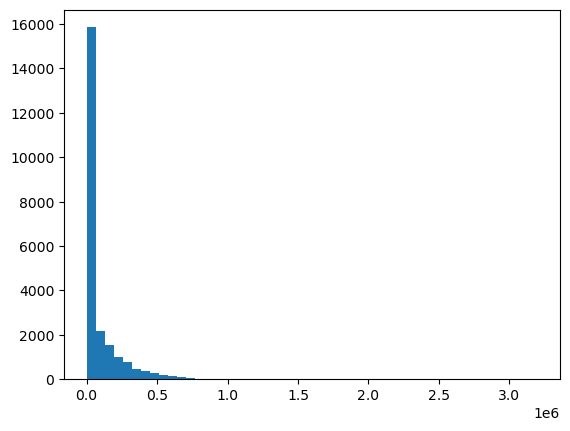

In [90]:
species = "Makrell"
X = df.loc[(df[species] > 0), species]
plt.hist(X, bins=50)
plt.show()

In [97]:
np.mean(X>1000)

0.5552253157917741

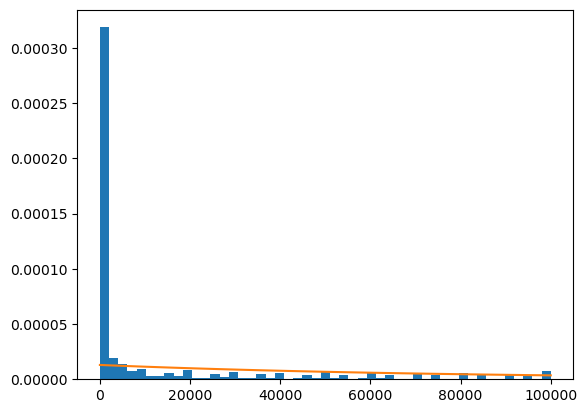

In [95]:
L = 1/np.mean(X)
xmax = 1_00_000
x = np.linspace(0, xmax, 100)
density = L*np.exp(-L*x)
plt.hist(X, bins=np.linspace(0, xmax, 50), density=True)
plt.plot(x, density)
plt.show()

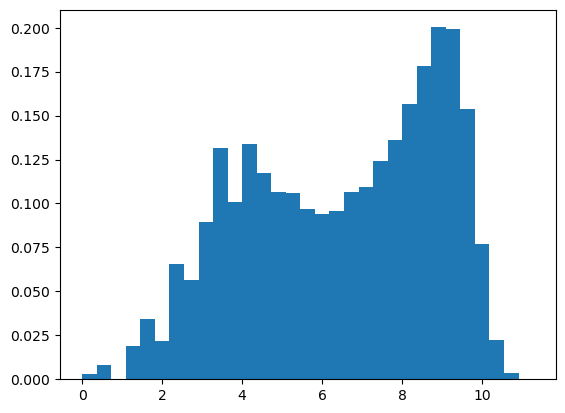

In [36]:
plt.hist(np.log(X), bins=31, density=True)
plt.show()

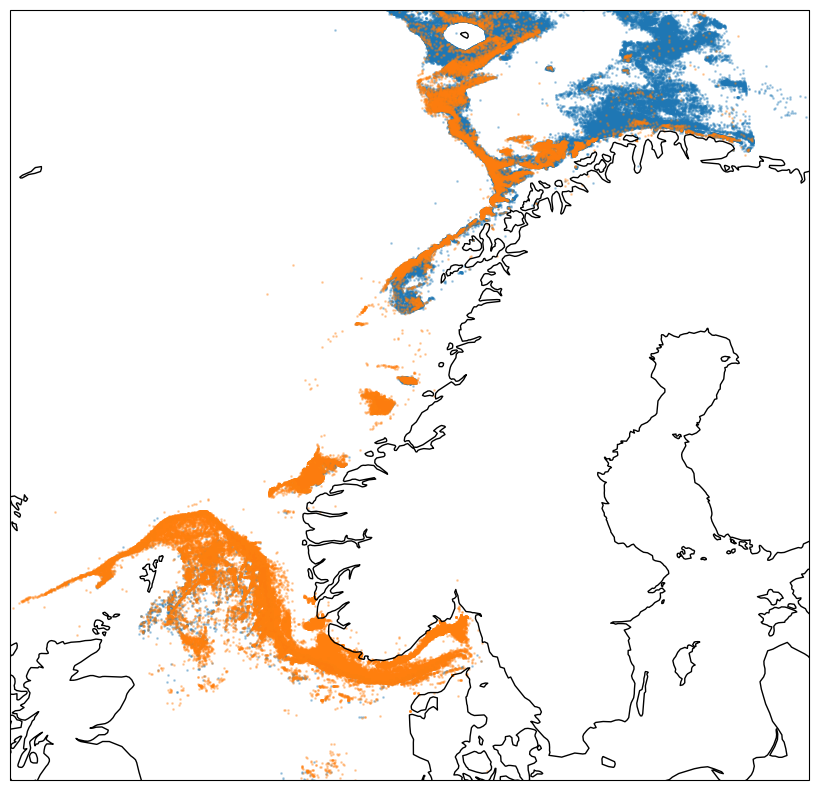

In [56]:
import cartopy.crs as ccrs
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea())
ax.coastlines()
df1 = df[(df['Torsk'] > 0) & (df['gear_group'] == 'Trål')]
idx = np.log(df1['Torsk']) > 6
ax.scatter(df1.loc[idx, 'stop_lon'], df1.loc[idx, 'stop_lat'], s=1, alpha=0.3, transform=ccrs.PlateCarree())
ax.scatter(df1.loc[~idx, 'stop_lon'], df1.loc[~idx, 'stop_lat'], s=1, alpha=0.3, transform=ccrs.PlateCarree())
ax.set_extent([-6, 22, 55, 75])
plt.show()

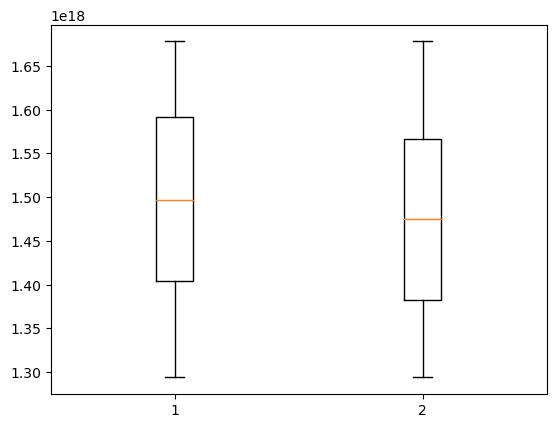

In [52]:
plt.boxplot([df1.loc[idx, 'stop_ts'].astype(int), df1.loc[~idx, 'stop_ts'].astype(int)])
plt.show()

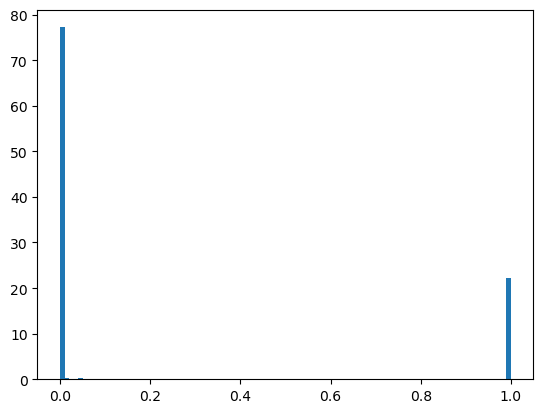

In [36]:
plt.hist(np.exp(-X), bins=100, density=True)
plt.show()